# <font color = 'green'> Data Preprocessing for PGA Tour Exploratory Data Analysis</font>

**Author: Stefan Jenss**

<div class="alert alert-block alert-success">Read the data into the notebook. Load in all necessary modules and packages.</div>

In [2]:
"""Import necessary libraries and set up the environment"""

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [3]:
"""Import the PGA Tour data"""

pga_tour_data = pd.read_csv('PGA_Tour_Raw_Data.csv')

'Import the PGA Tour data'

<div class="alert alert-block alert-success">Inspect the raw PGA Tour data using the <b>info( )</b>, <b>head( )</b>, and <b>tail( )</b> methods.</div>

In [4]:
"""
Use the .info() method to inspect the variable (column) names, the number of non-null values, and the data types for each variable.
"""

# Use the .info() method to inspect the data
pga_tour_data.info()

# Use the .head() and .tail() method to inspect the first five rows of the data
pga_tour_data.head()
pga_tour_data.tail()

'\nUse the .info() method to inspect the variable (column) names, the number of non-null values, and the data types for each variable.\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
36859,V. Singh,2271,392,144,146,33.0,26.4,26,0,0.6,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36860,W. Kim,2271,7082,144,150,18.5,12.9,21,0,0.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36861,W. McGirt,2271,3532,216,215,44.5,40.6,45,0,6.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36862,Z. Blair,2271,9040,288,278,73.0,70.8,74,3,23.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36863,Z. Sucher,2271,4708,144,147,22.5,18.9,28,0,0.0,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class = 'alert alert-block alert-success'><b><u>Description of population and the sample:</u></b></div>

1. The population being represented by this dataset is PGA Tour players who completed between 2015 - 2022. This dataset includes information on 333 PGA tour events that took place between the 2015 and 2022 seasons. The data covers 499 players who participated in these tournaments.

2. The dataset includes information about 36863 individual rounds of golf.

<div class="alert alert-block alert-success"><b><u>Data Dictionary:</u></b></div>

- The data dictionary includes all of the variables that will be used in the analysis, excluding those that are not relevant for the EDA.

| Variable | Description | Data Type
| --- | --- | --- |
| Player_initial_last | Initial of player's first name and their full last name | string object |
| player | The player's full name | string object |
| player id | A unique ID assigned to each individual player | string object |
| tournament name | The name of a tournament | string object |
| tournament id | A unique ID assigned to each individual tournament | string object |
| course | The name of the course the tournament is being played at | string object |
| date | The date the tournament is being played | string object |
| season | The year the tournament is being played | string object |
| purse | The total prize money available for the tournament | float |
| hole_par | The number of stroke expected for a player to get throughout tournament | integer |
| strokes | The actual number of stroke the player had over the course of a tournament | integer |
| n-rounds | The number of golf round a player completed in a tournament | integer |
| made_cut | Whether a player made the cut after the second round to continue onto the weekend rounds | integer |
| Finish | The position a player finished in a tournament (indicates whether they tied for that position) | string object |
| pos | The numerical position a player finished (exclusing whether they tied for that position) | float |
| no_cut | Whether or not the event included a cut after the first two days | integer |
| sg_putt | Strokes gained: putting | float |
| sg_arg | Strokes gained: around the green | float |
| sg_app | Strokes gained: approach the green | float |
| sg_ott | Strokes gained: off the tee | float |
| sg_t2g | Strokes gained: tee to green | float |
| sg_total | The total strokes gained over the round | float |
| total round | The total number of rounds a player has completed on a given golf course between the 2015 and 2021 season to be used as a reference for their performance in the 2022 season | integer |
| course experience | The label assigned to a player in the 2022 season based on the experience they had with the course between the 2015 and 2021 seasons | string object |

----

## <font color = 'green'><u>Phase 1: Data Inspection & Cleaning</u><font>

### Overall Inspection of the Dataset

<font color="green">**Key takeaways from dataset .info() inspection:**</font>
From the previously performed .info() method, the following observations were made.
- The strokes gained variables contain nulls. After inspecting the head and tail of the dataset, it becomes apparent that the data about older tournaments does not include strokes gained statistics.
- Additionally, the fields 21 through 22 entitled “Unnamed: 2,” “Unnamed: 3,” and “Unnamed: 4” appear to be completely empty variables, so these will likely be dropped from the dataset after further inspection.

In [5]:
"""
Use the .describe() method to inspect the summary statistics for the data.
"""

pga_tour_data.describe()

'\nUse the .describe() method to inspect the summary statistics for the data.\n'

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


In [6]:
"""
Calculate the number of unique tournaments and players in the dataset.
"""

# Find the number of tournements the dataset includes data on.
unique_tournaments = pga_tour_data['tournament id'].nunique()
print(f"Number of Unique Tournements in the Dataset: {unique_tournaments}")

# Find the number of players that are included in the dataset.
unique_players = pga_tour_data['player id'].nunique()
print(f"\nNumber of Unique Players in the Dataset: {unique_players}")


'\nCalculate the number of unique tournaments and players in the dataset.\n'

Number of Unique Tournements in the Dataset: 333

Number of Unique Players in the Dataset: 499


----

### Inspection of Questionable Variables

In [7]:
# Observe the 3 variables with no data to confirm that I am not dropping any valuable information.
pga_tour_data[['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']]
pga_tour_data['Unnamed: 2'].value_counts()
pga_tour_data['Unnamed: 3'].value_counts()
pga_tour_data['Unnamed: 4'].value_counts()

,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
36859,NaN,NaN,NaN
36860,NaN,NaN,NaN
36861,NaN,NaN,NaN
36862,NaN,NaN,NaN


Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

In [8]:
# Observe the "DKP", "FKP", and "SDP" variables.
pga_tour_data[['Player_initial_last',
               'hole_DKP','hole_FDP','hole_SDP',
               'streak_DKP','streak_FDP','streak_SDP',
               'finish_DKP','finish_FDP','finish_SDP',
               'total_DKP','total_FDP','total_SDP']]
# Based on inspecting the data, I've determined I won't need this data in my analysis

,Player_initial_last,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,finish_DKP,finish_FDP,finish_SDP,total_DKP,total_FDP,total_SDP
0,A. Ancer,60.0,51.1,56,3,7.6,3,2,1,0,65.0,59.7,59
1,A. Hadwin,72.5,61.5,61,8,13.0,3,5,4,2,85.5,78.5,66
2,A. Lahiri,21.5,17.4,27,0,0.0,0,0,0,0,21.5,17.4,27
3,A. Long,20.5,13.6,17,0,0.4,0,0,0,0,20.5,14.0,17
4,A. Noren,23.5,18.1,23,0,1.2,0,0,0,0,23.5,19.3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,V. Singh,33.0,26.4,26,0,0.6,0,0,0,0,33.0,27.0,26
36860,W. Kim,18.5,12.9,21,0,0.2,0,0,0,0,18.5,13.1,21
36861,W. McGirt,44.5,40.6,45,0,6.2,0,0,0,0,44.5,46.8,45
36862,Z. Blair,73.0,70.8,74,3,23.2,4,6,5,3,82.0,99.0,81


In [9]:
pga_tour_data[['Finish','pos']]
pga_tour_data['Finish'].value_counts()
pga_tour_data['pos'].value_counts()

,Finish,pos
0,T32,32.0
1,T18,18.0
2,CUT,NaN
3,CUT,NaN
4,CUT,NaN
...,...,...
36859,NaN,NaN
36860,NaN,NaN
36861,NaN,999.0
36862,NaN,12.0


Finish
CUT    12146
T17      327
T18      324
T13      296
T26      280
       ...  
49         1
39         1
38         1
46         1
91         1
Name: count, Length: 175, dtype: int64

pos
2.0      479
17.0     430
18.0     401
3.0      391
10.0     391
        ... 
999.0      7
83.0       6
86.0       4
87.0       2
91.0       1
Name: count, Length: 89, dtype: int64

In [10]:
# I want to investigate how the 'player' and 'Player_Initial_Last' differ.

pga_tour_data[['Player_initial_last','player']]

,Player_initial_last,player
0,A. Ancer,Abraham Ancer
1,A. Hadwin,Adam Hadwin
2,A. Lahiri,Anirban Lahiri
3,A. Long,Adam Long
4,A. Noren,Alexander Noren
...,...,...
36859,V. Singh,Vijay Singh
36860,W. Kim,Whee Kim
36861,W. McGirt,William McGirt
36862,Z. Blair,Zac Blair


In [11]:
pga_tour_data[['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']]

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,0.20,-0.13,-0.08,0.86,0.65,0.85
1,0.36,0.75,0.31,0.18,1.24,1.60
2,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,0.53,-0.36,-1.39,0.19,-1.56,-1.04
...,...,...,...,...,...,...
36859,NaN,NaN,NaN,NaN,NaN,NaN
36860,NaN,NaN,NaN,NaN,NaN,NaN
36861,NaN,NaN,NaN,NaN,NaN,NaN
36862,NaN,NaN,NaN,NaN,NaN,NaN


<font color = "green"><u>**Key takeaways from inspection of questionable variables**</u></font>
- The "unnamed variables" have no non-null data so I will inspect these variables and likely get rid of them.


- I will inspect the "DKP", "FKP", and "SDP" statistics, but because the [AdvancedSportsAnalaytics.com](http://advancedsportsanalaytics.com/) website is still down, I am unable to learn what these variables mean. Although frustrating, my analysis goals mainly just require strokes gained statistics, so I will remove the "DKP", "FKP", and "SDP" variables from the dataset.
    - My educated guess would be that these are point values assigned for different golf fantasy platforms. If this is correct, they are not important for the EDA, so I'm inclined to remove them from the final dataset.


- The "Finish" variable is an object because it contains a string of the player's finishing position because some include "T" infront of the numerical finish the the player tied. The "pos" variable is a float because it is the player's numerical finishing position alone.
    - Investigation of the “Finish” and “pos” variable reveals that some of the elements are missing finish position. We do not want our data to include instances in which players finishing positions are missing, as a players finishing position is the primary indicator for how they played. To address this, these elements of the data will need to be removed.
    

- The 'Player_initial_last' variable has the last name with first name initial, while the 'player' variable has the player's full name.


- Not all of the tournaments have strokes gained information. Since these contain nulls, they have to be addressed by either assigning a value to the nulls or by removing these elements from the dataset.

----

### Dropping Undesired Variables

In [12]:
# Drop the 3 variables with no values.
pga_tour_data.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [13]:
# Confirm that the variables were dropped using true false logic.
if 'Unnamed: 2' and 'Unnamed: 3' and 'Unnamed: 4' in pga_tour_data.columns:
    print('Variables not dropped')
else:
    print('Unnamed variables successfully dropped')

Unnamed variables successfully dropped


In [14]:
# Drop the "DKP", "FKP", and "SDP" variables.
pga_tour_data.drop(columns = 
                   ['hole_DKP','hole_FDP','hole_SDP',
                    'streak_DKP','streak_FDP','streak_SDP',
                    'finish_DKP','finish_FDP','finish_SDP',
                    'total_DKP','total_FDP','total_SDP'],
                  inplace = True)

# Confirm that the variables were dropped using true false logic.
if 'hole_DKP' and 'hole_FDP' and 'hole_SDP' and 'streak_DKP' and 'streak_FDP' and 'streak_SDP' and 'finish_DKP' and 'finish_FDP' and 'finish_SDP' and 'total_DKP' and 'total_FDP' and 'total_SDP' in pga_tour_data.columns:
    print('Variables not dropped')
else:
    print('"DKP", "FKP", and "SDP" variables successfully dropped')

"DKP", "FKP", and "SDP" variables successfully dropped


----

### <u>Evaluating Field Types</u>

### Changing All Identifying Variables to Objects

<font color = 'green'><u>**The Player and Tournament Identifier Variables:**</u></font>
1. 'Player_initial_last'
2. 'tournament id'
3. 'player id'
4. 'player'
5. 'tournament name'
6. 'course'
7. 'season'


In [15]:
"""
Change all identifying variables to string data types and confirm the change was successfully made.
"""

# Define all the identifying variables
identifying_variables = ['Player_initial_last', 'tournament id', 'player id', 'player', 'tournament name', 'course', 'season']

# Define all the identifying variables that are not already strings and change them to strings
for variables in identifying_variables:
    if pga_tour_data[variables].dtype != 'object':
        pga_tour_data[variables] = pga_tour_data[variables].astype('object')
        
# Confirm that the variables were changed to strings using .info()
pga_tour_data[identifying_variables].info()

'\nChange all identifying variables to string data types and confirm the change was successfully made.\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Player_initial_last  36864 non-null  object
 1   tournament id        36864 non-null  object
 2   player id            36864 non-null  object
 3   player               36864 non-null  object
 4   tournament name      36864 non-null  object
 5   course               36864 non-null  object
 6   season               36864 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


----

### Addressing Missing Values in Total Dataset

Not all of the tournaments included in this dataset have strokes gained statistics for the playered; however, the data from these tournaments is still valuables, as they will contribute to the "course experience" analysis that I will perform later int he EDA.

<u>**Addressing Unusual `pos` values**</u>

In [16]:
# Copy the original pga_tour_data.
pga_cleaning = pga_tour_data.copy()

# Replace all of the 999.9 values with 0, since the player
# did not achieve a valid finishing position.
pga_cleaning['pos'] = pga_cleaning['pos'].replace({999.0:0})

# Examine the 'pos' variable to confirm that the 999.0 values were replaced with 0 using .value_counts() and .describe()
pga_cleaning['pos'].value_counts()
pga_cleaning['pos'].describe()

# Identify the number of Null values in the 'pos' variable.
pga_cleaning['pos'].isnull().sum() # 15,547 Null values

pos
2.0     479
17.0    430
18.0    401
3.0     391
10.0    391
       ... 
0.0       7
83.0      6
86.0      4
87.0      2
91.0      1
Name: count, Length: 89, dtype: int64

count    21317.000000
mean        33.840315
std         21.378972
min          0.000000
25%         15.000000
50%         32.000000
75%         51.000000
max         91.000000
Name: pos, dtype: float64

15547

<Axes: xlabel='pos', ylabel='Count'>

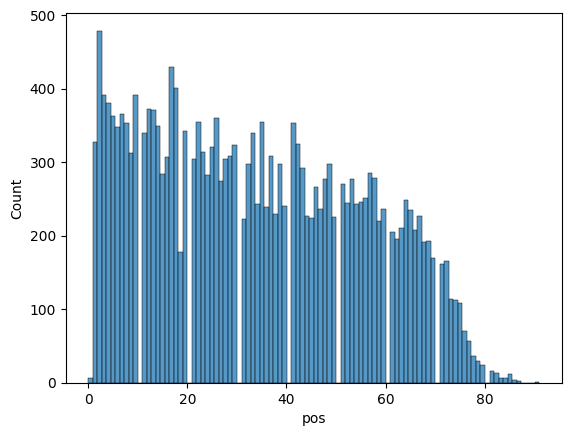

In [17]:
# Create a histogram of the 'pos' variable to help identify any other discrepencies in the pos data.
sns.histplot(data = pga_cleaning, x = 'pos', bins = 100)

In [18]:
# Now, replace all of the Null values with 0, since
# this means that they did not achieve a valid finishing position.
pga_cleaning['pos'] = pga_cleaning['pos'].fillna(0)
pga_cleaning['pos'].value_counts()

pos
0.0     15554
2.0       479
17.0      430
18.0      401
10.0      391
        ...  
84.0        7
83.0        6
86.0        4
87.0        2
91.0        1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='pos', ylabel='Count'>

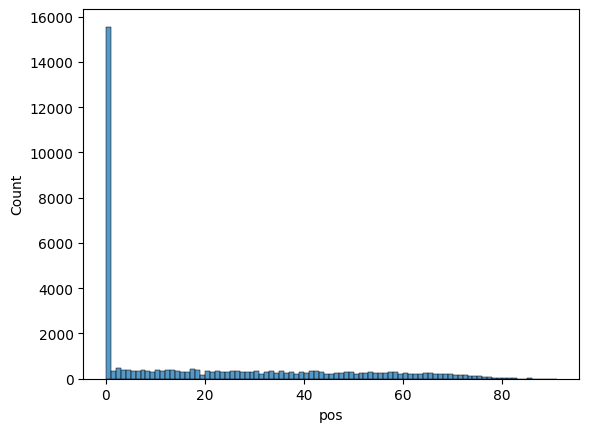

In [19]:
# Create another histogram of the 'pos' variable to confirm that the Null values were replaced with 0 and to observe any other discrepensies in the `pos` data.
sns.histplot(data = pga_cleaning, x = 'pos', bins = 91)

In [20]:
"""
Sum the count of all the 0 values in the `pos` variable and the count of all the non-zero values in the `pos` variable to see how they compare.
"""
zero_values = pga_cleaning['pos'].value_counts()[0]
non_zero_values = pga_cleaning['pos'].value_counts()[1:].sum()

# Display the results
print(f"Number of 0 values in the 'pos' variable: {zero_values}") # 15,554 0 values
print(f"Number of non-zero values in the 'pos' variable: {non_zero_values}") # 13,865 non-zero values

'\nSum the count of all the 0 values in the `pos` variable and the count of all the non-zero values in the `pos` variable to see how they compare.\n'

Number of 0 values in the 'pos' variable: 15554
Number of non-zero values in the 'pos' variable: 13865


/var/folders/t2/xw_g33n96rxfmq14n3dnpb6h0000gn/T/ipykernel_15543/3288825574.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  non_zero_values = pga_cleaning['pos'].value_counts()[1:].sum()


When comparing the number of zero-position values to non-zero-position values from our, we find that ~47.13% of players make the cut and have a valid finishing position. 

This makes sense when we consider the structure of the "cut" on the PGA Tour. Tournament on the PGA Tour are structured in a way that ~150 players start the tournament and only the top 70, including ties, make the cut. Based on these number, ~46.67% of players make the cut, which is very similar to the proportion that we see here.

<u>**Evaluting `pos` and `Finish` to make sure sure their values allign**</u>

In [21]:
# Examine the `pos` and `Finish` variables to see if they are the same.
pga_cleaning[['tournament name', 'season','player' ,'pos', 'Finish']]


,tournament name,season,player,pos,Finish
0,The Memorial Tournament pres. by Nationwide,2022,Abraham Ancer,32.0,T32
1,The Memorial Tournament pres. by Nationwide,2022,Adam Hadwin,18.0,T18
2,The Memorial Tournament pres. by Nationwide,2022,Anirban Lahiri,0.0,CUT
3,The Memorial Tournament pres. by Nationwide,2022,Adam Long,0.0,CUT
4,The Memorial Tournament pres. by Nationwide,2022,Alexander Noren,0.0,CUT
...,...,...,...,...,...
36859,Frys.com Open,2015,Vijay Singh,0.0,NaN
36860,Frys.com Open,2015,Whee Kim,0.0,NaN
36861,Frys.com Open,2015,William McGirt,0.0,NaN
36862,Frys.com Open,2015,Zac Blair,12.0,NaN


It is observed that some of the `Finish` positions do not properly reflect the player's true finishing position
- i.e., Zac Blair's `pos` value for the 2015 Frys.com Open is 12.0; however, his `Finish` position is NaN.

In [22]:
"""
To make the `Finish` variable more consistent with the `pos` variable, I will replace all of the 'NaN' `Finish` values with the corresponding `pos` value.
To note #1: the `Finish` variable is a string data type, and the `pos` variable is a flat data type, so this will need to be taken into consideration when replacing the values. 
To note #2: the shortcoming of this method is that the `Finish` variable is a string data type, and includes a 'T' in front of the player's finishing position to indicate that they tied with another player. 
I will try to address this later in the cleaning process.
"""

# Replace all of the 'NaN' `Finish` values with the corresponding `pos` value
pga_cleaning['Finish'] = pga_cleaning['Finish'].fillna(pga_cleaning['pos'])

# Confirm that the 'NaN' values were replaced with the corresponding `pos` value using .isnull().sum()
pga_cleaning['Finish'].isnull().sum()

# Since a 0 value in the `pos` variable indicates that the player did not achieve a valid finishing position, 
# I will replace all of the '0' values in the `Finish` variable do be 'CUT' to indicate that the player did not make the cut
pga_cleaning['Finish'] = pga_cleaning['Finish'].replace({0:'CUT'})

"""
To Note #3: There are other values in the `Finish` variable that indicate that the player did not make the cut, such as 'WD' and 'DQ', or `MDF` (made cut, did not finish).
While we will not be able to determine if the player made the cut or not, we can determine if they 'WD' (withdrew) or 'MDF' based on the variables `n_rounds` and `made_cut`.
If the player withdrew, then the `n_rounds` variable will be either 1, and if the player made the cut but did not finish, then the `n_rounds` variable will be 3.
"""

# For all players with `n_rounds` equal to 1, replace the corresponding `Finish` value with `WD`
pga_cleaning.loc[pga_cleaning['n_rounds'] == 1, 'Finish'] = 'WD'

# For all players with `n_rounds` equal to 3, replace the corresponding `Finish` value with `MDF`
pga_cleaning.loc[pga_cleaning['n_rounds'] == 3, 'Finish'] = 'MDF'

# Confirm that the '0' values were replaced with 'CUT' and that the 'NaN' values were replaced with the corresponding `pos` value
pga_cleaning[['tournament name', 'season','player' ,'pos', 'Finish']].head()
pga_cleaning[['tournament name', 'season','player' ,'pos', 'Finish']].tail()



"\nTo make the `Finish` variable more consistent with the `pos` variable, I will replace all of the 'NaN' `Finish` values with the corresponding `pos` value.\nTo note #1: the `Finish` variable is a string data type, and the `pos` variable is a flat data type, so this will need to be taken into consideration when replacing the values. \nTo note #2: the shortcoming of this method is that the `Finish` variable is a string data type, and includes a 'T' in front of the player's finishing position to indicate that they tied with another player. \nI will try to address this later in the cleaning process.\n"

0

"\nTo Note #3: There are other values in the `Finish` variable that indicate that the player did not make the cut, such as 'WD' and 'DQ', or `MDF` (made cut, did not finish).\nWhile we will not be able to determine if the player made the cut or not, we can determine if they 'WD' (withdrew) or 'MDF' based on the variables `n_rounds` and `made_cut`.\nIf the player withdrew, then the `n_rounds` variable will be either 1, and if the player made the cut but did not finish, then the `n_rounds` variable will be 3.\n"

,tournament name,season,player,pos,Finish
0,The Memorial Tournament pres. by Nationwide,2022,Abraham Ancer,32.0,T32
1,The Memorial Tournament pres. by Nationwide,2022,Adam Hadwin,18.0,T18
2,The Memorial Tournament pres. by Nationwide,2022,Anirban Lahiri,0.0,CUT
3,The Memorial Tournament pres. by Nationwide,2022,Adam Long,0.0,CUT
4,The Memorial Tournament pres. by Nationwide,2022,Alexander Noren,0.0,CUT


,tournament name,season,player,pos,Finish
36859,Frys.com Open,2015,Vijay Singh,0.0,CUT
36860,Frys.com Open,2015,Whee Kim,0.0,CUT
36861,Frys.com Open,2015,William McGirt,0.0,MDF
36862,Frys.com Open,2015,Zac Blair,12.0,12.0
36863,Frys.com Open,2015,Zack Sucher,0.0,CUT


<u>**Addressing `Null` strokes-gained values**</u>

Now, to make sure that the nulls are addressed within the strokes gained statistics, all of the missing data values will be changed to 0 so that the players’ participation in this tournament can still be used for analysis not involving strokes-gained data.

In [23]:
# Before addressing the `Null` values in the strokes-gained variable, create a copy of the pga_cleaning data to be used for the creation
# of the strokes-gained dataframe.
pga_cleaning_sg_copy = pga_cleaning.copy()

# Define all of the strokes-gained variables
sg_variables = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

# Address all the Null values in the strokes-gained variables and replace them with 0.
for variables in sg_variables:
    pga_cleaning[variables] = pga_cleaning[variables].fillna(0)
    
# Confirm that the Null values were replaced with 0 using .isnull().sum()
pga_cleaning[sg_variables].isnull().sum()

sg_putt     0
sg_arg      0
sg_app      0
sg_ott      0
sg_t2g      0
sg_total    0
dtype: int64

----

## <font color = 'green'><u>Phase 1.2: Creating the Strokes-Gained Dataframe</u></font>

All of the tournaments in the dataset do not include the strokes gained (SG) statistics. Because these SG statistics are very important to by EDA, I am creating a new DataFrames that only includes tournaments that have SG data available.


1. Identify all the tournaments that have strokes gained data.
    
2. Create a list of all the tournaments that have strokes gained data.
    
3. Remove all the players that are missing strokes gained data from those tournaments.

In [24]:
"""
Create a new `sg_data` dataframe that only includes the data from tournaments that includes strokes-gained data.
"""

# Create a new dataframe that only includes the data from tournaments that includes strokes-gained data.
sg_data_clean = pga_cleaning_sg_copy[pga_cleaning_sg_copy['sg_total'].notnull()]

"""
By looking at the .info() after executing the above code, it's identified that the `sg_total` variable contains 29181 non-null values, while the other strokes-gained variables only contain 29180 non-null values.
This indicates that there is one row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.
Thus, the next step is to identify this row of data and remove it from the dataframe.
"""

# Identify the row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.
sg_data_clean[sg_data_clean['sg_arg'].isnull()] # Row 2068 - C. Hoffman, 2022 - AT&T Pebble Beach Pro-Am

# Remove this row of data that contains nulls for non-`sg_total` strokes-gained variables.
sg_data_clean = pga_cleaning_sg_copy[pga_cleaning_sg_copy['sg_putt'].notnull()]

# Confirm that the new dataframe only includes the data from tournaments that included strokes gained data.
sg_data_clean.info()

# View the head and tail of the new dataframe to observe the new strokes-gained data.
sg_data_clean.head()
sg_data_clean.tail()


'\nCreate a new `sg_data` dataframe that only includes the data from tournaments that includes strokes-gained data.\n'

"\nBy looking at the .info() after executing the above code, it's identified that the `sg_total` variable contains 29181 non-null values, while the other strokes-gained variables only contain 29180 non-null values.\nThis indicates that there is one row of data that contains a value for `sg_total`, but not for the other strokes-gained variables.\nThus, the next step is to identify this row of data and remove it from the dataframe.\n"

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
2069,C. Hoffman,401353235,205,72,70,1,0,0.0,Charley Hoffman,AT&T Pebble Beach Pro-Am,...,8.7,2022,0,WD,NaN,NaN,NaN,NaN,NaN,2.23


<class 'pandas.core.frame.DataFrame'>
Index: 29180 entries, 0 to 36752
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  29180 non-null  object 
 1   tournament id        29180 non-null  object 
 2   player id            29180 non-null  object 
 3   hole_par             29180 non-null  int64  
 4   strokes              29180 non-null  int64  
 5   n_rounds             29180 non-null  int64  
 6   made_cut             29180 non-null  int64  
 7   pos                  29180 non-null  float64
 8   player               29180 non-null  object 
 9   tournament name      29180 non-null  object 
 10  course               29180 non-null  object 
 11  date                 29180 non-null  object 
 12  purse                29180 non-null  float64
 13  season               29180 non-null  object 
 14  no_cut               29180 non-null  int64  
 15  Finish               29180 non-null  obje

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,4,1,32.0,Abraham Ancer,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,4,1,18.0,Adam Hadwin,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,2,0,0.0,Anirban Lahiri,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,2,0,0.0,Adam Long,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,2,0,0.0,Alexander Noren,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
36748,W. McGirt,2260,3532,284,275,4,1,33.0,William McGirt,Shriners Hospital for Children Open,...,6.2,2015,0,T33,0.09,0.36,-0.37,0.66,0.66,0.75
36749,W. Roach,2260,6185,284,276,4,1,42.0,Wes Roach,Shriners Hospital for Children Open,...,6.2,2015,0,T42,0.55,0.04,0.54,-0.64,-0.05,0.50
36750,W. Simpson,2260,1614,284,269,4,1,4.0,Webb Simpson,Shriners Hospital for Children Open,...,6.2,2015,0,T4,-0.02,0.76,1.23,0.28,2.27,2.25
36751,Z. Blair,2260,9040,142,140,2,0,75.0,Zac Blair,Shriners Hospital for Children Open,...,6.2,2015,0,T75,-0.22,0.51,-0.56,-0.58,-0.63,-0.84
36752,Z. Sucher,2260,4708,142,142,2,0,0.0,Zack Sucher,Shriners Hospital for Children Open,...,6.2,2015,0,CUT,1.15,-1.38,-0.38,-0.34,-2.10,-0.95


In [25]:
"""
For the analysis of strokes-gained data, I only want to include players that have either completed 2 round and missed the cut, or have completed all 4 rounds having made the cut.
If the player either withdrew, was disqualified, or make the cut but did not finish, this strokes-gained data will likely be skewed and not be a good representation of their performance.

Thus, I will create a new dataframe called `sg_data_clean` that only includes players that have either completed 2 round and missed the cut, or have completed all 4 rounds having made the cut.
"""

# Create a new dataframe called `sg_data_clean` that aligns with the criteria above
sg_data_clean = sg_data_clean[(sg_data_clean['n_rounds'] == 2) & (sg_data_clean['Finish'] == 'CUT') | (sg_data_clean['n_rounds'] == 4) & (sg_data_clean['Finish'] != 'CUT')]

# Confirm that the new dataframe only includes the criteria above
sg_data_clean

'\nFor the analysis of strokes-gained data, I only want to include players that have either completed 2 round and missed the cut, or have completed all 4 rounds having made the cut.\nIf the player either withdrew, was disqualified, or make the cut but did not finish, this strokes-gained data will likely be skewed and not be a good representation of their performance.\n\nThus, I will create a new dataframe called `sg_data_clean` that only includes players that have either completed 2 round and missed the cut, or have completed all 4 rounds having made the cut.\n'

,Player_initial_last,tournament id,player id,hole_par,strokes,n_rounds,made_cut,pos,player,tournament name,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,4,1,32.0,Abraham Ancer,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,4,1,18.0,Adam Hadwin,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,2,0,0.0,Anirban Lahiri,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,2,0,0.0,Adam Long,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,2,0,0.0,Alexander Noren,The Memorial Tournament pres. by Nationwide,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,W. Kim,2260,7082,284,277,4,1,49.0,Whee Kim,Shriners Hospital for Children Open,...,6.2,2015,0,T49,0.66,-0.27,0.26,-0.39,-0.41,0.25
36748,W. McGirt,2260,3532,284,275,4,1,33.0,William McGirt,Shriners Hospital for Children Open,...,6.2,2015,0,T33,0.09,0.36,-0.37,0.66,0.66,0.75
36749,W. Roach,2260,6185,284,276,4,1,42.0,Wes Roach,Shriners Hospital for Children Open,...,6.2,2015,0,T42,0.55,0.04,0.54,-0.64,-0.05,0.50
36750,W. Simpson,2260,1614,284,269,4,1,4.0,Webb Simpson,Shriners Hospital for Children Open,...,6.2,2015,0,T4,-0.02,0.76,1.23,0.28,2.27,2.25


----

## Inspection of Individual Variables

**Inspection of the `player` field**

In [26]:
pga_cleaning['player'].value_counts()

player
Brian Stuard       212
Danny Lee          209
Brian Harman       203
Robert Streb       198
Nick Taylor        194
                  ... 
Ken Tanigawa         1
Bryce Easton         1
Daniel Nisbet        1
Neil Schietekat      1
Wen-Chong Liang      1
Name: count, Length: 499, dtype: int64

**Inspection of `Player_initial_last` field**

In [27]:
pga_cleaning['Player_initial_last'].value_counts()

Player_initial_last
B. Stuard      212
D. Lee         209
B. Harman      203
R. Streb       198
N. Taylor      194
              ... 
F. Jr.           1
J. Boros         1
M. Williams      1
B. Paolini       1
W. Liang         1
Name: count, Length: 497, dtype: int64

**Inspection of `player id` field**

In [28]:
pga_cleaning['player id'].value_counts()

player id
3599    212
3950    209
1225    203
5619    198
3792    194
       ... 
421       1
5842      1
4984      1
5095      1
5209      1
Name: count, Length: 499, dtype: int64

**Inspection of `season` field**

In [29]:
pga_cleaning['season'].value_counts()

season
2021    5688
2019    5150
2018    4979
2017    4745
2020    4287
2015    4174
2016    4165
2022    3676
Name: count, dtype: int64

### Inspection of Tournament-Specific Variables

**Inspection of `tournament name` field**

In [30]:
pga_cleaning['tournament name'].value_counts()

tournament name
Farmers Insurance Open                 1121
AT&T Pebble Beach Pro-Am               1099
The Honda Classic                      1061
PGA Championship                       1046
Shriners Hospital for Children Open    1037
                                       ... 
The CJ Cup @ Shadow Creek                78
The CJ Cup @ Summit                      75
WGC-Workday Championship                 70
Hyundai Tournament of Champions          64
SBS Tournament of Champions              32
Name: count, Length: 80, dtype: int64

**Inspection of `tournament id` field**

In [31]:
pga_cleaning['tournament id'].value_counts()

tournament id
401223849    157
401155473    156
401155460    156
401155466    155
401056558    155
            ... 
401077167     18
2605          18
401148244     18
401243433      2
2251           1
Name: count, Length: 333, dtype: int64

**Inspection of the `course` field**

In [32]:
pga_cleaning['course'].value_counts()

course
Pebble Beach Resort - Pebble Beach, CA              1220
Torrey Pines North - La Jolla, CA                   1121
La Quinta CC - La Quinta, CA                        1121
Muirfield Village Golf Club - Dublin, OH            1077
Sea Island Resort - Sea Island, GA                  1072
                                                    ... 
Caves Valley Golf Club - Baltimore, MD                69
Aronimink Golf Club - Newton Square, PA               69
Olympia Fields Country Club - Olympia Fields, IL      69
Crooked Stick - Carmel, IN                            68
Isleworth - Windemere, FL                             18
Name: count, Length: 92, dtype: int64

**Inspection of the `date` field**

In [33]:
pga_cleaning['date'].value_counts()

date
2021-07-18    253
2019-07-21    235
2022-03-06    206
2017-07-23    187
2018-10-28    186
             ... 
2015-12-06     18
2016-12-04     18
2019-12-07     18
2021-05-02      2
2015-06-28      1
Name: count, Length: 320, dtype: int64

**Inspection of the `purse` field**

In [34]:
pga_cleaning['purse'].value_counts()
pga_cleaning['purse'].describe()

purse
7.00    2351
6.60    2107
6.20    1947
7.50    1657
6.70    1355
        ... 
4.30     107
9.20      98
4.20      94
9.95      65
3.40      36
Name: count, Length: 64, dtype: int64

count    36864.000000
mean         7.529612
std          2.192712
min          3.000000
25%          6.400000
50%          7.100000
75%          8.700000
max         20.000000
Name: purse, dtype: float64

**Inspection of the `hole_par` field**

In [35]:
pga_cleaning['hole_par'].value_counts()

hole_par
288    8448
284    6269
144    5453
280    5194
142    5084
140    3760
215     483
282     476
287     436
216     358
292     276
72      132
71      117
143      86
285      76
210      76
70       68
286      60
213      11
146       1
Name: count, dtype: int64

**Inspection of the `no_cut` field**

In [36]:
pga_cleaning['no_cut'].value_counts()

no_cut
0    34457
1     2407
Name: count, dtype: int64

### Inspection of Player Performance Variables

**Inspection of the `n_rounds` field**

In [37]:
pga_cleaning['n_rounds'].value_counts()

n_rounds
4    21306
2    14211
3     1030
1      317
Name: count, dtype: int64

**Throughout the entire dataset:**
- There were 317 players who only completed 1 round of a tournament.
    - This would be due to either player disqualification or player withdrawal from the tournament.
- There were 1030 players who only completed 3 rounds.
    - This would also either be due to disqualification or withdrawal from the tournament.
- There were 14211 players who only completed 2 rounds of a tournament.
    - This would be due to players not making the cut.
- There were 21306 players who completed the entire tournament (4 rounds).
    - These players made the weekend cut and did not withdrawal from the tournament. There are the players that will have a finishing position.

*For some of the analysis, I anticipate that I will not want to exclude players that only completed 1 or 3 rounds, because there players likely withdrew from the tournament.*

**Inspection of the `made_cut` field**

In [38]:
pga_cleaning['made_cut'].value_counts()

made_cut
1    22336
0    14528
Name: count, dtype: int64

These numbers are inline with the numbers above from the 'n_rounds' variable.

**Inspection of the `strokes` field**

In [39]:
pga_cleaning['strokes'].value_counts()

strokes
144    1400
145    1362
143    1294
146    1262
147    1191
       ... 
230       1
167       1
170       1
171       1
166       1
Name: count, Length: 155, dtype: int64

**Inspection of the `Finish` field**

In [40]:
pga_cleaning['Finish'].value_counts()

Finish
CUT    13859
MDF     1147
T17      327
WD       325
T18      324
       ...  
47         1
46         1
39         1
89         1
38         1
Name: count, Length: 259, dtype: int64

**Inspection of the `pos` field**

In [41]:
pga_cleaning['pos'].value_counts()

pos
0.0     15554
2.0       479
17.0      430
18.0      401
10.0      391
        ...  
84.0        7
83.0        6
86.0        4
87.0        2
91.0        1
Name: count, Length: 89, dtype: int64

### Inspection of the Strokes Gained Variables

To inspect these variables, I will use the pga_sg dataframe, because this is the dataframe that I will be conduction strokes gained analysis on.

**Inspection of the `sg_putt` field**

In [42]:
sg_data_clean['sg_putt'].value_counts()
sg_data_clean['sg_putt'].describe()

sg_putt
 0.04    131
-0.19    128
 0.10    128
 0.01    126
-0.02    126
        ... 
-3.94      1
-3.75      1
-5.55      1
-4.23      1
-5.19      1
Name: count, Length: 752, dtype: int64

count    27711.000000
mean        -0.100739
std          1.091447
min         -5.990000
25%         -0.740000
50%         -0.020000
75%          0.630000
max          4.430000
Name: sg_putt, dtype: float64

**Inspection of the `sg_arg` field**

In [43]:
sg_data_clean['sg_arg'].value_counts()
sg_data_clean['sg_arg'].describe()

sg_arg
 0.00    204
 0.04    198
-0.01    197
 0.10    196
 0.01    196
        ... 
 1.92      1
-3.31      1
-2.70      1
-3.36      1
-4.99      1
Name: count, Length: 555, dtype: int64

count    27711.000000
mean        -0.030153
std          0.706711
min         -6.430000
25%         -0.430000
50%          0.010000
75%          0.420000
max          3.140000
Name: sg_arg, dtype: float64

**Inspection of the `sg_app` field**

In [44]:
sg_data_clean['sg_app'].value_counts()
sg_data_clean['sg_app'].describe()

sg_app
 0.33    145
 0.29    130
 0.04    128
 0.09    128
 0.15    128
        ... 
-4.58      1
-4.45      1
 2.72      1
 3.18      1
-5.40      1
Name: count, Length: 765, dtype: int64

count    27711.000000
mean        -0.078251
std          1.086213
min         -7.510000
25%         -0.710000
50%          0.020000
75%          0.650000
max          4.670000
Name: sg_app, dtype: float64

**Inspection of the `sg_ott` field**

In [45]:
sg_data_clean['sg_ott'].value_counts()
sg_data_clean['sg_ott'].describe()

sg_ott
 0.14    200
 0.05    192
 0.20    191
 0.32    188
 0.21    182
        ... 
-2.72      1
-2.68      1
-4.03      1
-3.88      1
-4.17      1
Name: count, Length: 603, dtype: int64

count    27711.000000
mean        -0.031874
std          0.784525
min         -7.740000
25%         -0.440000
50%          0.050000
75%          0.480000
max          2.770000
Name: sg_ott, dtype: float64

**Inspection of the `sg_t2g` field**

In [46]:
sg_data_clean['sg_t2g'].value_counts()
sg_data_clean['sg_t2g'].describe()

sg_t2g
 0.42    100
 0.12     92
-0.08     92
 0.91     92
 0.10     92
        ... 
-5.74      1
 3.78      1
 4.17      1
-7.02      1
-4.58      1
Name: count, Length: 1052, dtype: int64

count    27711.000000
mean        -0.140255
std          1.591444
min        -13.950000
25%         -1.030000
50%          0.020000
75%          0.940000
max          6.300000
Name: sg_t2g, dtype: float64

**Inspection of the `sg_total` field**

In [47]:
sg_data_clean['sg_total'].value_counts()
sg_data_clean['sg_total'].describe()

sg_total
-0.47    144
 0.08    120
-0.50    119
-0.28    118
 0.00    118
        ... 
-5.64      1
-6.41      1
-6.43      1
 5.11      1
 3.46      1
Name: count, Length: 1179, dtype: int64

count    27711.000000
mean        -0.237943
std          1.911271
min        -12.460000
25%         -1.320000
50%         -0.100000
75%          1.090000
max          8.520000
Name: sg_total, dtype: float64

### Investigation of Outliers Among Strokes Gained Variables

<Axes: >

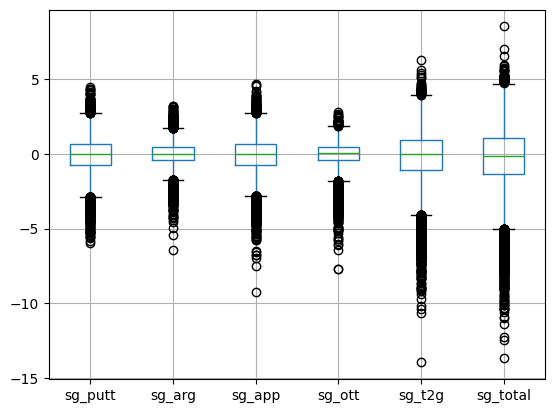

In [48]:
# Boxingplots of the desires variables I want to observe further.
# sg_variables = ['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']

pga_tour_data.boxplot(column = ['sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total'])

<font color = 'green'><u>**Takeaway:**</u></font>

Although there are several outliers in the strokes gained variables, these data points represent actual performances of players in a tournament. Whether they were exceptionally good or bad, this information is valuable and should not be excluded from the dataframe during analysis.

----

## <font color = "green">Phase 1.3: Creation of "Course Experience" Variable and DataFrame </font>

In the analysis phase of the EDA, I want to analyze whether a player's previous course experience has an impact on their performance at a given course.
To do this, I will create a new variable called `course_experience` that calculates the number of rounds the player has previously played at that course
prior to the current tournament.

Method for creating the `course_experience` variable:
1. Group the dataset by player and course, and calculate the cumulative sum of n_rounds.
2. Subtract the current n_rounds from the cumulative sum to get the number of rounds the player has previously played at that course.
3. Sort the dataset by player, course, and season in ascending order.
4. Reset the course_experience to 0 for the first season of each player and course combination.

In [56]:
# Group the dataset by player and course, and calculate the cumulative sum of n_rounds
pga_cleaning['course_experience'] = pga_cleaning.groupby(['player', 'course'])['n_rounds'].cumsum()

# Subtract the current n_rounds from the cumulative sum to get the number of rounds the player has previously played at that course
pga_cleaning['course_experience'] -= pga_cleaning['n_rounds']

# Sort the dataset by player, course, and season in ascending order
pga_cleaning.sort_values(['player', 'course', 'season'], inplace=True)

# Reset the course_experience to 0 for the first season of each player and course combination
pga_cleaning.loc[pga_cleaning.groupby(['player', 'course'])['season'].idxmin(), 'course_experience'] = 0

# Display the updated dataset
pga_cleaning[['Player_initial_last', 'n_rounds', 'course', 'tournament name', 'season', 'course_experience']].head(30)
pga_cleaning[['Player_initial_last', 'n_rounds', 'course', 'tournament name', 'season', 'course_experience']].tail(30)


,Player_initial_last,n_rounds,course,tournament name,season,course_experience
29111,A. Baddeley,4,"Baltusrol - Springfield, NJ",PGA Championship,2016,0
26443,A. Baddeley,4,"Bay Hill - Orlando, FL",Arnold Palmer Invitational Pres. by Mastercard,2017,0
16605,A. Baddeley,4,"Bay Hill - Orlando, FL",Arnold Palmer Invitational Pres. by Mastercard,2019,4
28626,A. Baddeley,2,"Bethpage - Farmingdale, NY",The Barclays,2016,0
30962,A. Baddeley,4,"Coco Beach - Rio Grande, Puerto Rico",Puerto Rico Open,2016,0
17017,A. Baddeley,4,"Coco Beach - Rio Grande, Puerto Rico",Puerto Rico Open,2019,4
34265,A. Baddeley,2,"Colonial - Ft. Worth, TX",Crowne Plaza Invitation,2015,0
30032,A. Baddeley,4,"Colonial - Ft. Worth, TX",Dean & Deluca Invitational,2016,2
25458,A. Baddeley,2,"Colonial - Ft. Worth, TX",Dean & Deluca Invitational,2017,6
20669,A. Baddeley,2,"Colonial - Ft. Worth, TX",Fort Worth Invitational,2018,8


,Player_initial_last,n_rounds,course,tournament name,season,course_experience
11444,Z. Lombard,4,"Chapultepec - Mexico City, Mexico",WGC-Mexico Championship,2020,0
14314,Z. Lombard,2,"Royal Portrush - Portrush, Northern Ireland",The Open,2019,0
29546,Z. Lombard,4,"Royal Troon - Ayrshire, Scotland",The Open,2016,0
12787,Z. Lombard,4,"Sheshan International GC - Shanghai, China",WGC-HSBC Champions,2020,0
21779,Z. Dou,2,"Corales Puntacana GC - Punta Cana, Dominican R...",Corales Puntacana Resort & Club Championship,2018,0
23224,Z. Dou,1,"El Camaleon GC - Quintana Roo, Mexico",OHL Classic at Mayakoba,2018,0
19707,Z. Dou,2,"Glen Abbey Golf Club - Oakville, Canada",RBC Canadian Open,2018,0
22034,Z. Dou,2,"Innisbrook - Palm Harbor, FL",Valspar Championship,2018,0
19796,Z. Dou,1,"Keene Trace Golf Club - Nicholasville, KY",Barbasol Championship,2018,0
22917,Z. Dou,3,"La Quinta CC - La Quinta, CA",CareerBuilder Challenge,2018,0


<div class="alert alert-block alert-success">
Export the cleaned data sets.</div>

In [ ]:

pga_cleaning.to_csv('pga_clean.csv', header = True, index = False)

## <font color = "green">Phase 2: Data Analysis</font>

### <font color = "darkgreen">Question 1</font>

What aspect of a player's golf game is the most important predictor of whether or not they perform well in a tournament?

In [ ]:
# For this analysis, I will be using the strokes gained statistic. So, I will be utilizing the
# pga_sg DataFrame that exclused tournaments that don't have strokes gained information.

# Display pga_sg DataFrame information for reference.
pga_sg.info()

In [ ]:
sg_vars = ['pos','sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']
sns.pairplot(pga_sg[sg_vars])

<font color = 'green'><u>**Key takeaways:**</u></font>

For my analysis of the strokes gained data, I am going to want to try only including the data for players that completed all 4 rounds of golf to see how the results differ.

- Additionally, for the sake of analysis, I am going to remove everyone who has a finishing position of 0.

In [ ]:
# Create a new DataFrame that only includes information for players that completed all four rounds of golf
# and who don't have a finishing position of 0
pga_sg_4 = pga_sg[(pga_sg['n_rounds'] == 4) & (pga_sg['pos'] != 0)]

# Create a PairGrid containing scatter plots and kde plots for the strokes gained variables and finishing position
test = sns.PairGrid(pga_sg_4[sg_vars], diag_sharey=False)
test.map_upper(sns.kdeplot)
test.map_lower(sns.scatterplot)
test.map_diag(sns.kdeplot)

<font color = 'red'><u>**Important Note:**</u><font>

- When analyzing the strokes gained variables, there will always be the greatest correlation between “strokes gained: total” and finishing position. This is because the player the wins the tournament will have the score that is farther away from the mean in the negative direction, and therefore, they will have the greatest number of strokes gained on the field as a whole.

<font color = 'green'><u>**Key takeaways:**</u><font>

- When determining which aspects of a players game is the most important predictor of whether they perform well in a tournament, we are most interested in the top row of the PairGrid, and the leftmost column of the PairGrid.
    
    
- For the top row of kernel density estimate (KDE) plots, the top performing players are those towards the bottom of the graph, so we want to see which variables have the most negative relationship.
    
    - Upon observation of the top KDE plots (disregarding the st_total variables), the other two variables that seems to have the greatest negative correlation with finishing position are “sg_app” (Strokes Gained - Approach) and “sp_t2g” (Strokes Gained - Tee to Green).
    
    
- “Strokes Gained - Approach” and “Strokes Gained -Tee 2 Green” being the most important indicators of a player's performance in a golf tournament is also supported by the following plots:
    
    - Strokes Gained - Approach x Strokes Gained - Total (both scatter and KDE plots)
        - Since the best-performing players will have the highest “Strokes Gained - Total”, since these two variable appears to be positively correlated with one another, this indicates that “Strokes Gained - Approach” is an important indicator of a player’s overall performance.
    
    - Strokes Gained - Tee to Green x Strokes Gained - Total (both scatter and KDE plots)
        - For the same reason as stated above, the positive correlation between “Strokes Gained - Tee to Green” and “Strokes Gained - Total” indicates that “Strokes Gained - Tee to Green is an important indicator of a player’s overall performance.
    
    
- Further, we observe the relationship between “Strokes Gained - Tee to Green” and the other strokes gained variables, we see that ‘Strokes Gained - Tee to Green” has the strongest positive correlation with “Strokes Gained - Approach.” This indicates that how a player is performing with their approach shots strongly contributes to their “Stroked Gained - Tee to Green” and their overall success in tournaments.

<font color = 'blue'><u>**Next Steps:**</u><font>

- I will generate a correlation matrix and a Seaborn heatmap to delve deeper into the relationship between the strokes gained variables, their correlation with the finishing position, and with each other.

In [ ]:
# Create DataFrame for correlations
sg_df_corr = pga_sg_4[sg_vars]

# Create a correlation matrix
corr_sg = sg_df_corr.corr()
corr_sg

# Create a heatmap of the correlation matrix
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corr_sg, vmax = .90, square = True, annot = True, cmap = 'Spectral', linewidths = 0.5)

<font color = 'green'><u>**Key takeaways:**</u></font>

- The results of the heatmap of the correlation matrix confirm the findings from the PairGrid plots:
    - Strokes Gained - Tee to Green has a moderately strong correlation with finishing position (-0.67) and Strokes Gained - Total (0.77).
    - Strokes Gained - Approach has a moderate correlation with finishing position (-0.48) and Strokes Gained - Total (0.56).
    - Strokes Gained - Approach has a moderately strong correlation with Strokes Gained - Tee to Green (0.73), indicating the important contribution that approach shots have to Strokes Gained - Tee to Green
- **New finding:** The heatplot further revealed that “sg_putt” (Strokes Gained - Putting) is almost equally as correlated with finishing position as Strokes Gained - Approach is (-0.43 vs -0.48).

### <font color = 'green'>Conclusions:</font>
- The most important aspects of a professional golfer’s game are the following (in order):
    1. Strokes gained - Tee to Green
    2. Strokes gained - Approach
    3. Strokes gained - Putting
    
    
- Additionally, a player’s Strokes Gained - Approach most affects their Strokes Gained - Tee to Green.
    - This implies that a player’s approach game is a more important performance off the tee and around the green.

### <font color = "darkgreen">Question 2</font> 

Are there specific courses on the PGA tour schedule that reward experience the most?
- In other words, which courses do players who have played the course multiple times perform the best?

<font color = 'darkorange'><u>**Approach:**</u></font>

To answer this question, I am going to use the 2022 season DataFrame that I created earlier that contains the newly created "previous total rounds" and "course experience" variables.


**1. First,** I am going to analyze whether there is a correlation between the number of rounds a player has previously played at a course and their finishing position.

In [ ]:
# Look at the list of all the course that are included in the 2022 season data.
unique_courses = season_2022_exp['course'].unique()
unique_courses

In [ ]:
# Create a scatterplot of the 'previous total rounds' and 'pos' variables to explore any potential relationship
sns.scatterplot(data=season_2022_exp, x='previous total rounds', y='pos')

In [ ]:
# Recreate the scatterplot with a DataFrame that removes the players the didn't complete the tournment
# and don't have a finishing position above 0.

# Create new DataFrame that excludes players that finishing with a position of '0'.
season_22_finish = season_2022_exp[season_2022_exp['pos'] != 0]

# Recreate the regression scatterplot.
sns.lmplot(data=season_22_finish, x='previous total rounds', y='pos', line_kws={'color': 'black'}, legend = True)

<font color = 'green'><u>**Impression**:</u></font>

- There is a slight downward trend between finishing position and total number of previous rounds played, meaning that those who have more experience with the course perform slightly better overall throughout the season.

**2. Secondly,** I am going to generate side-by-side boxplots of player course experience and finishing position to see if the distributions show any meaningful difference.

In [ ]:
# Create the side-by-side boxplot of the distribution of finishing position among players of the 
# three different course experience levels.
sns.boxplot(data=season_22_finish, x = 'pos', y = 'course experience')

<font color = 'green'><u>**Impression**:</u></font>

- In general, experienced and knowledgeable golfers tend to perform slightly better than novice players; however, the difference in the distribution is not significant.


- Out of the three categories, experienced golfers tend to perform the best. This is expected, as in most sports (up until a certain point) the more time they have to improve and understand their game, the better they will perform. However, it is important to note that there is little difference in distribution between the experienced and knowledgeable golfers.

**3. Thirdly,** I am going to create a bar graph that shows the total number of rounds the previous winners had played on the course prior to them winning there in the 2022 season.
- I am also going to repeat this, but instead of just including the golfers who won the tournament, I am going to include the average total previous rounds played of all the players who placed 5th or above. I will do this again for all players who place 10th or above to see how the results change when including a larger sample of the top performing golfers.

In [ ]:
# Create new DataFrame of just the 2022 season winners.
winners_2022 = season_2022_exp[season_2022_exp['pos'] == 1]
winners_2022

In [ ]:
# Create a horizontal barchart
fig, ax = plt.subplots(figsize = (10,10))

winners_sort = winners_2022.sort_values(by = 'previous total rounds')

ax.barh(winners_sort['course'], winners_sort['previous total rounds'], align = 'center')

ax.set(xlabel = 'Previous rounds played on course by winner', ylabel = 'Course',
      title = "Previous Course Experience of Winners in 2022 Season")

<font color = 'green'><u>**Impression:**</u></font>

- When just considering the winners of the tournaments, the top 5 courses that most favor course experience are:
    1. Pebble Beach Resort
    2. Muirfield Village Golf Club
    3. La Quinta CC
    4. Torrey Pines North
    5. Waialae CC

In [ ]:
# Create bar graph with the average previous total rounds for the players who finished in position 5 or better.

# Get the average previous total rounds played by the players who finishing in position 5 and above
# for each fo the tournaments (groups by course).

# Create a new DataFrame that only includes players that finishing in position 5 and above.
finishing_pos = [1, 2, 3, 4, 5]
top_5 = season_22_finish[season_22_finish['pos'].isin(finishing_pos)]

# Group the new DataFrame by 'course'
grouped_course = top_5.groupby('course')

# Calculate the average of 'previous total rounds' for each 'course' group.
average_previous_rounds = grouped_course['previous total rounds'].mean().reset_index()

# Rename 'previous total rounds' to 'average round of top 5'

average_previous_rounds = average_previous_rounds.rename(columns={'course': 'Course',
                                                                  'previous total rounds': 'Average round of top 5',})

average_previous_rounds

In [ ]:
# Create a horizontal barchart of this data.
fig, ax = plt.subplots(figsize = (10,10))

top_5_avg_sorted = average_previous_rounds.sort_values(by = 'Average round of top 5')

ax.barh(top_5_avg_sorted['Course'], top_5_avg_sorted['Average round of top 5'], align = 'center')

ax.set(xlabel = 'Average previous rounds played by top 5 finishing players', ylabel = 'Course',
      title = "Average Previous Course Experience of Top 5 Finishing Player by Course in 2022 Season")

<font color = 'green'><u>**Impression:**</u></font>

- When considering the average previous total rounds played among players finishing 5th or above, the top 5 courses that favor course experience are:
    1. Pebble Beach Resort 
    2. Torrey Pines North
    3. Waialae CC
    4. La Quinta CC
    5. Albany - New Providence
    
    In this list, Pebble Beach Resort remains the top course that favors course experience. The only course that difference between these two lists are that Muirfield Village Golf Club moves out of the top 5 down to 15th, and Albany - New Providence is the new 5th.

In [ ]:
# Create bar graph with the average previous total rounds for the players who finished in position 10 or better.

# Get the average previous total rounds played by the players who finishing in position 10 and above
# for each fo the tournaments (groups by course).

# Create a new DataFrame that only includes players that finishing in position 10 and above.
finishing_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
top_10 = season_22_finish[season_22_finish['pos'].isin(finishing_pos)]

# Group the new DataFrame by 'course'
grouped_course = top_10.groupby('course')

# Calculate the average of 'previous total rounds' for each 'course' group.
average_previous_rounds_10 = grouped_course['previous total rounds'].mean().reset_index()

# Rename 'previous total rounds' to 'average round of top 5'

average_previous_rounds_10 = average_previous_rounds_10.rename(columns={'course': 'Course',
                                                                  'previous total rounds': 'Average round of top 10',})

average_previous_rounds_10

In [ ]:
# Create a horizontal barchart of this data.
fig, ax = plt.subplots(figsize = (10,10))

top_10_avg_sorted = average_previous_rounds_10.sort_values(by = 'Average round of top 10')

ax.barh(top_10_avg_sorted['Course'], top_10_avg_sorted['Average round of top 10'], align = 'center')

ax.set(xlabel = 'Average previous rounds played by top 10 finishing players', ylabel = 'Course',
      title = "Average Previous Course Experience of Top 10 Finishing Player by Course in 2022 Season")

<font color = 'green'><u>**Impression:**</u></font>

- When considering the average previous total rounds played among players finishing 5th or above, the top 10 courses that favor course experience are:
    1. Pebble Beach Resort
    2. TPC Scottsdale
    3. Torrey Pines North
    4. Waialae CC
    5. Colonial
    
    In this list, Pebble Beach Report remains the top course that favors course experience. The courses that remain from the first two lists are Pebble Beach Report, Torrey Pines North, and Waialae CC. The new courses that enter the top 5 are TPC Scottsdale and Colonial.

### <font color = 'green'>Conclusion:<font>
- In the 2022 season, the courses that favored players with the most course experience were **Pebble Beach Resort, Torrey Pines North**, and **Waialae CC.**
    - Notably, **Augusta National Golf Club** and **TPC Sawgrass** were also favorable to players with significant course experience.

### <font color = "darkgreen">Question 3</font>

On which courses is it most important to be "hot with the putter"? In other words, on which courses is it most important for the winners of the tournament to have a high stroked gained - putting statistic?

<font color = 'darkorange'><u>**Approach:**</u><font>
1. Calculate the average of the “Strokes Gained Putting Ratio” of all the players that have won tournaments on each course.
    - Strokes Gained - Putting alone is not a good indicator of how important it is to be “hot with the putter” on a given golf course, because courses with easy greens will likely have winners with very high Strokes Gained Putting.
        - Therefore, the approach I’m going to take is to calculate the “Strokes Gained Putting Ratio”, which will be the ratio of Strokes Gained - Putting to Strokes Gained - Total, since Strokes Gained - Total is the indicator of the player's overall performance.
        - Ultimately, the “Strokes Gained Putting Statistic” is an indicator of how much the player’s putting contributed to them winning the tournament. It is logical to assume that on putter-intensive courses, the winner’s putting will have to contributing significantly to their overall performance.

    
2. Sort the list of “Average Strokes Gained Putting Ratios of All Winning Players by Course” to determine which courses historically have had winners with the highest Strokes Gained  Putting Ratio statistic.

In [ ]:
# Create a new DataFrame that only includes players that have won tournaments.
pga_winners = pga_sg[pga_sg['pos'] == 1].copy()

# Calculate the Strokes Gained Putting Ratio 'sg_putt_ratio'
pga_winners.loc[:, 'sg_putt_ratio'] = pga_winners['sg_putt'] / pga_winners['sg_total']
pga_winners

In [ ]:
# Group the new pga_winners DataFrame by course.
pga_winners_course = pga_winners.groupby('course')

# Create a new DataFrame that includes the average 'sg_putt_ratio' of all the winner on each course.
average_winning_sg_putt_ratios = pga_winners_course['sg_putt_ratio'].mean().reset_index()
average_winning_sg_putt_ratios

In [ ]:
# Create a sorted horizontal bar chart of the “Average Strokes Gained - Putting of All Winning Players by Course”.
fig, ax = plt.subplots(figsize = (14,14))

average_winning_sg_putt_ratios_sorted = average_winning_sg_putt_ratios.sort_values(by = 'sg_putt_ratio')

ax.barh(average_winning_sg_putt_ratios_sorted['course'], average_winning_sg_putt_ratios_sorted['sg_putt_ratio'], align = 'center')

ax.set(xlabel = "Average Strokes Gained Putting Ratio of All Winners",
      ylabel = "Courses",
      title = "Average Strokes Gained Putting Ratio of All Winning Players by Course")

<font color = 'green'><u>**Key Takeaways:**</u></font>

In the 2015 to 2022 PGA Tour seasons, the courses where being “hot with the putter” has been most important have been:

1. Caves Valley Golf Club
2. Aronimink Golf Club
3. Shadow Creek GC
4. La Quinta CC
5. TPC Harding Park
6. Memorial Park GC
7. Old White Course
8. Waialae CC
9. Trinity Forest Golf Club
10. TPC Four Seasons Resort Golf Club

Extra Testing

In [ ]:
positive_sg_putt_ratios = pga_winners[pga_winners['sg_putt_ratio'] >= 0]

fig = px.scatter(positive_sg_putt_ratios, x='sg_putt', y='sg_total', color='course',
                 size='sg_putt_ratio',
                 title='Strokes Gained Putting Ratio',
                 color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()